In [119]:
import csv
import random
import math
import operator
import matplotlib.pyplot as plt
import numpy as np

In [104]:
with open('iris.data.txt', 'r') as csvfile:

    lines = csv.reader(csvfile)

    for row in lines :

        print (', '.join(row))

5.1, 3.5, 1.4, 0.2, Iris-setosa
4.9, 3.0, 1.4, 0.2, Iris-setosa
4.7, 3.2, 1.3, 0.2, Iris-setosa
4.6, 3.1, 1.5, 0.2, Iris-setosa
5.0, 3.6, 1.4, 0.2, Iris-setosa
5.4, 3.9, 1.7, 0.4, Iris-setosa
4.6, 3.4, 1.4, 0.3, Iris-setosa
5.0, 3.4, 1.5, 0.2, Iris-setosa
4.4, 2.9, 1.4, 0.2, Iris-setosa
4.9, 3.1, 1.5, 0.1, Iris-setosa
5.4, 3.7, 1.5, 0.2, Iris-setosa
4.8, 3.4, 1.6, 0.2, Iris-setosa
4.8, 3.0, 1.4, 0.1, Iris-setosa
4.3, 3.0, 1.1, 0.1, Iris-setosa
5.8, 4.0, 1.2, 0.2, Iris-setosa
5.7, 4.4, 1.5, 0.4, Iris-setosa
5.4, 3.9, 1.3, 0.4, Iris-setosa
5.1, 3.5, 1.4, 0.3, Iris-setosa
5.7, 3.8, 1.7, 0.3, Iris-setosa
5.1, 3.8, 1.5, 0.3, Iris-setosa
5.4, 3.4, 1.7, 0.2, Iris-setosa
5.1, 3.7, 1.5, 0.4, Iris-setosa
4.6, 3.6, 1.0, 0.2, Iris-setosa
5.1, 3.3, 1.7, 0.5, Iris-setosa
4.8, 3.4, 1.9, 0.2, Iris-setosa
5.0, 3.0, 1.6, 0.2, Iris-setosa
5.0, 3.4, 1.6, 0.4, Iris-setosa
5.2, 3.5, 1.5, 0.2, Iris-setosa
5.2, 3.4, 1.4, 0.2, Iris-setosa
4.7, 3.2, 1.6, 0.2, Iris-setosa
4.8, 3.1, 1.6, 0.2, Iris-setosa
5.4, 3.4

Splitting the data

In [105]:
def loadDataset(filename, split, trainingSet=[] , testSet=[]):

    with open(filename, 'r') as csvfile:

        lines = csv.reader(csvfile)

        dataset = list(lines)
        random.seed(0)
        random.shuffle(dataset)

        for x in range(len(dataset)):

            for y in range(4):

                dataset[x][y] = float(dataset[x][y])

    indx= int(len(dataset)*split)
    trainingSet= dataset[:indx]
    testSet=dataset[indx:]
    return trainingSet , testSet

In [106]:
trainingSet=[]

testSet=[]

k=loadDataset('iris.data.txt', 0.66, trainingSet, testSet)

print ('Train: ' + repr(len(trainingSet)))

print ('Test: ' + repr(len(testSet)) )
print(k)

Train: 0
Test: 0
([[5.2, 3.5, 1.5, 0.2, 'Iris-setosa'], [7.0, 3.2, 4.7, 1.4, 'Iris-versicolor'], [5.5, 2.3, 4.0, 1.3, 'Iris-versicolor'], [6.3, 2.7, 4.9, 1.8, 'Iris-virginica'], [5.7, 3.0, 4.2, 1.2, 'Iris-versicolor'], [5.8, 4.0, 1.2, 0.2, 'Iris-setosa'], [6.2, 2.2, 4.5, 1.5, 'Iris-versicolor'], [7.7, 3.0, 6.1, 2.3, 'Iris-virginica'], [6.0, 2.2, 5.0, 1.5, 'Iris-virginica'], [4.7, 3.2, 1.6, 0.2, 'Iris-setosa'], [4.6, 3.2, 1.4, 0.2, 'Iris-setosa'], [6.7, 2.5, 5.8, 1.8, 'Iris-virginica'], [5.1, 3.7, 1.5, 0.4, 'Iris-setosa'], [5.9, 3.0, 5.1, 1.8, 'Iris-virginica'], [5.1, 3.3, 1.7, 0.5, 'Iris-setosa'], [6.7, 3.1, 5.6, 2.4, 'Iris-virginica'], [7.1, 3.0, 5.9, 2.1, 'Iris-virginica'], [5.2, 2.7, 3.9, 1.4, 'Iris-versicolor'], [5.2, 4.1, 1.5, 0.1, 'Iris-setosa'], [6.7, 3.3, 5.7, 2.5, 'Iris-virginica'], [5.7, 2.5, 5.0, 2.0, 'Iris-virginica'], [5.8, 2.8, 5.1, 2.4, 'Iris-virginica'], [6.4, 2.7, 5.3, 1.9, 'Iris-virginica'], [4.6, 3.4, 1.4, 0.3, 'Iris-setosa'], [6.5, 2.8, 4.6, 1.5, 'Iris-versicolor'],

Distance function : Similarity

In [107]:
def euclideanDistance(instance1, instance2, length):
    difference_squared = 0
    for x in range(length):
        difference_squared += pow((instance1[x] - instance2[x]), 2)
    return math.sqrt(difference_squared)

In [108]:
data1 = [2, 2, 2, 'a']

data2 = [4, 4, 4, 'b']

distance = euclideanDistance(data1, data2, 3)

print ('Distance: ' + repr(distance))

Distance: 3.4641016151377544


Neighbors :

In [109]:
def getNeighbors(trainingSet, testInstance, k):

    distances = []

    length = len(testInstance)-1
    #print("length", length)
    for x in range(len(trainingSet)):

        dist = euclideanDistance(testInstance, trainingSet[x], length)
        #print("dist",dist)
        distances.append((trainingSet[x], dist))
    #print("distance without sort",distances)   
 # itemgetter : dans ce cas, elle permet d'ordonner les keys avec le premier element (dist)
    distances.sort(key=operator.itemgetter(1))
    #print("distance with sort",distances)   


    neighbors = []

    for x in range(k):

      neighbors.append(distances[x][0])

    return neighbors
    



In [110]:
trainSet = [[2, 2, 2, 'a'], [4, 4, 4, 'b']]

testInstance = [5, 5, 5]

k = 1

neighbors = getNeighbors(trainSet, testInstance, 1)

print(neighbors)

[[4, 4, 4, 'b']]


Response:

In [111]:
def getResponse(neighbors):

    classVotes = {}

    for x in range(len(neighbors)):

        response = neighbors[x][ -1 ] #complete with appropriate number
        classVotes.setdefault(response,0)

        if response in classVotes.keys():

            classVotes[response]+=1

    sortedVotes = sorted(classVotes.items(), key=operator.itemgetter(1), reverse=True)

    return sortedVotes[0][0]

In [112]:
neighbors = [[1,1,1,'a'], [2,2,2,'a'], [3,3,3,'b']]

response = getResponse(neighbors)

print(response)

a


Accuracy:

In [113]:
def getAccuracy(testSet, predictions):
    correct=0
    for x in range(len(testSet)):
        
        if(testSet[x][-1]==predictions[x]):
            correct+=1
        



    return (correct/len(testSet)) * 100.0

In [114]:
testSet = [[1,1,1,'a'], [2,2,2,'a'], [3,3,3,'b']]

predictions = ['a', 'a', 'a']

accuracy = getAccuracy(testSet, predictions)

print(accuracy)

66.66666666666666


Main:

In [115]:
def main(dataset_filename, k, split, distanceFunc):
    
    trainingSet, testSet=loadDataset(dataset_filename, split)
    
    predictions = []
    for testInstance in testSet:
        neighbors = getNeighbors(trainingSet, testInstance[:-1], k)
        response = getResponse(neighbors)
        predictions.append(response)
        
    accuracy = getAccuracy(testSet, predictions)
    print("Accuracy = %.2f" % accuracy)
    return accuracy

In [116]:
scores=[]
for k in range(1,31):
    accuracy=main("iris.data.txt", k, 0.66, euclideanDistance)
    scores.append(accuracy)

Accuracy = 90.20
Accuracy = 90.20
Accuracy = 90.20
Accuracy = 90.20
Accuracy = 92.16
Accuracy = 94.12
Accuracy = 96.08
Accuracy = 94.12
Accuracy = 96.08
Accuracy = 94.12
Accuracy = 98.04
Accuracy = 94.12
Accuracy = 94.12
Accuracy = 94.12
Accuracy = 94.12
Accuracy = 94.12
Accuracy = 94.12
Accuracy = 94.12
Accuracy = 94.12
Accuracy = 94.12
Accuracy = 94.12
Accuracy = 94.12
Accuracy = 94.12
Accuracy = 94.12
Accuracy = 94.12
Accuracy = 94.12
Accuracy = 96.08
Accuracy = 92.16
Accuracy = 94.12
Accuracy = 94.12


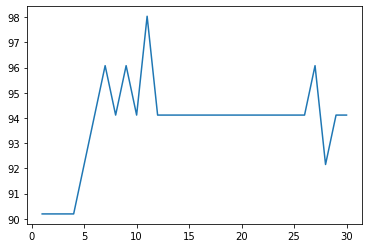

In [117]:
plt.plot(range(1,31),scores)

Another distance metric:

In [120]:
print("the best Accuracy is",np.max(scores))
print("best k is :", np.argmax(scores)+1)

the best Accuracy is 98.0392156862745
best k is : 11


In [121]:
def manhattanDistance(instance1, instance2, length):
    #   Complete the function
    distance = 0
    for i in range(length):
        distance += abs(instance2[i]-instance1[i])

    return distance

def minkowskiDistance(instance1, instance2, length,degree=2):
    difference_squared = 0
    for x in range(length):
        difference_squared += pow((instance1[x] - instance2[x]), degree)
    return pow(difference_squared,1/degree)

Manhattan distance :

In [122]:
scores=[]
for k in range(1,31):
    accuracy=main("iris.data.txt", k, 0.66, manhattanDistance)
    scores.append(accuracy)

Accuracy = 90.20
Accuracy = 90.20
Accuracy = 90.20
Accuracy = 90.20
Accuracy = 92.16
Accuracy = 94.12
Accuracy = 96.08
Accuracy = 94.12
Accuracy = 96.08
Accuracy = 94.12
Accuracy = 98.04
Accuracy = 94.12
Accuracy = 94.12
Accuracy = 94.12
Accuracy = 94.12
Accuracy = 94.12
Accuracy = 94.12
Accuracy = 94.12
Accuracy = 94.12
Accuracy = 94.12
Accuracy = 94.12
Accuracy = 94.12
Accuracy = 94.12
Accuracy = 94.12
Accuracy = 94.12
Accuracy = 94.12
Accuracy = 96.08
Accuracy = 92.16
Accuracy = 94.12
Accuracy = 94.12


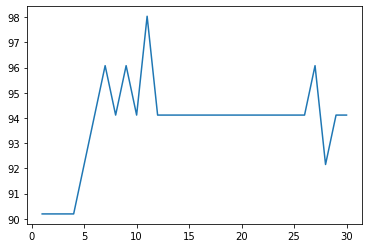

In [123]:
plt.plot(range(1,31),scores)

Minkowski distance :

In [124]:
scores=[]
for k in range(1,31):
    accuracy=main("iris.data.txt", k, 0.66, minkowskiDistance)
    scores.append(accuracy)

Accuracy = 90.20
Accuracy = 90.20
Accuracy = 90.20
Accuracy = 90.20
Accuracy = 92.16
Accuracy = 94.12
Accuracy = 96.08
Accuracy = 94.12
Accuracy = 96.08
Accuracy = 94.12
Accuracy = 98.04
Accuracy = 94.12
Accuracy = 94.12
Accuracy = 94.12
Accuracy = 94.12
Accuracy = 94.12
Accuracy = 94.12
Accuracy = 94.12
Accuracy = 94.12
Accuracy = 94.12
Accuracy = 94.12
Accuracy = 94.12
Accuracy = 94.12
Accuracy = 94.12
Accuracy = 94.12
Accuracy = 94.12
Accuracy = 96.08
Accuracy = 92.16
Accuracy = 94.12
Accuracy = 94.12


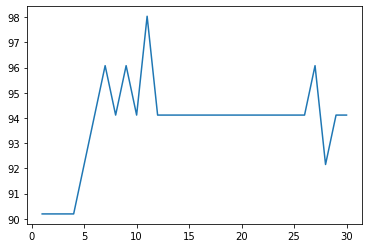

In [125]:
plt.plot(range(1,31),scores)

Euclidean and Minkowski ditances gave the best accuracies (98,03) with the same value of k=11